# Estimating the energy requirement of a city's population
Ali A. Eftekhari
Researcher  
Danish Hydrocarbon Research and Technology Centre (DHRTC)  
Technical University of Denmark  
January 2020

## Goal
* Estimating type and magnitude of energy requirement
  - per person per day
  - for different life styles, e.g., European
  - with a clear amendable procedure
  - by following MacKay with some modifications (https://withouthotair.com)

## Types of energy consumption
  * Heating
  * Cooling
  * Travel (short and long distances)
  * Food
  * Other household electricity
  * Other services
  * Stuff

## Heating
* A house loses heat to the cold surrounding
* The heat loss must be balanced by a heat source
  - Burning a fuel, solar heating, geothermal, heat pump, etc.
* Heat loss is proportional to the temperature difference between the house and the surrounding

<img src="./figs/home-158089.svg" width="400">



## Heat loss from a building
* $T_\inf$: ambient temperature [K]
* $T_h$: temperature of the house [K]
* $U$: heat transfer coefficient [J/(m$^2$.K.s)]
* $A$: heat transfer area, i.e., surface area of the house [m$^2$]
* $Q_{loss}$: heat loss from the building per unit time [J/s]
### $$Q_{loss} = U A \left(T_h - T_\inf \right)$$

## Heat loss: example
* A 90 m$^2$ house, built on a square piece of land
* A Danish winter
* Heat transfer coefficient: see [its wikipedia page](https://en.wikipedia.org/wiki/Heat_transfer_coefficient)
* Overal heat transfer coefficient: 0.2 to 2.0 J/(m$^2$.K.s) for walls and windows.
  - See, e.g., [this](http://article.sapub.org/10.5923.j.arch.20120204.03.html)

In [9]:
# Calculations:
import math
T_inf = 0.0 + 273.15   # [K]
T_h   = 22.0 + 273.15  # [K]
U     = 0.5            # W/(m^2.K)
L     = math.sqrt(90.0)     # [m] length of the house
A     = 6*L**2         # m^2 heat transfer area
Q_loss = U*A*(T_h-T_inf)
print('Heat loss from the house is', Q_loss, 'W')

Heat loss from the house is 5940.0 W


## Power and energy
* Power is defined as the flow of energy
* Unit for power is energy per time, e.g., J/s = Watt
* Unit of energy is J
* 1 J and 1 W are small values
* The most common commercial units for power and energy are kW and kWh respectively.
* 1 kWh is the consumed energy in one hour from a power source of 1 kW.
### $$ \textrm{kWh} = 3600 \textrm{ kJ}$$

## Heat loss: continue
* It's hard to have a feeling of the unit Watt [J/s]
* 100 Watt is the power consumption of an old incandescent light bulb
<img src="./figs/light-311119.svg" width="100">

In [10]:
print('Heat loss can be compensated by turning', Q_loss/100, 'old light bulbs on')

Heat loss can be compensated by turning 59.4 old light bulbs on


## Energy and power units of choice
* In this course, we work with 
  - kWh/day for power
  - kWh for energy
* We always normalize the numbers _per person_

## Important unit conversions
$$ 1 \textrm{ kWh/day} = 1 \textrm{ kWh/day} \div 24 \frac{h}{day} = 0.04167 \textrm{ kW}$$

$$ 1 \textrm{ kWh} = 3600 \textrm{ kJ} = 3,600,000 \textrm{ J}$$

## Hot water
* Specific heat capacity: required amount of energy to increase the temperature of one unit mass of a fluid [J/(kg.K]
  - for water, $c_p$ = 4200 J/(kg.K)
To warm 30 liters of water from 10$^o C$ to 50$^o C$ for a shower: 
$$Q_{shower} = V_{water} \rho_{water} c_p \left(T_{hot} - T_{cold} \right)$$
* $\rho_{water}$: water density [kg/m$^3$]
* $V_{water}$: volume of water required for a shower [m$^3$]

## Hot water: example
* Calculate the amount of energy for
  - taking a shower
  - making coffee and tea for a day

In [5]:
cp       = 4200.    # [J/kg/K]
V_shower = 30.0     # [Lit]
V_coffee = 2.0      # [lit]
T_shower = 50. + 273.15 # [K]
T_coffee = 100.+273.15  # [K]
T_tap   = 10. + 273.15 # [K]
rho_water = 1000.       # [kg/m^3]

Q_shower = V_shower/1000*rho_water*cp*(T_shower-T_tap)
Q_coffee = V_coffee/1000*rho_water*cp*(T_coffee-T_tap)

print('Shower energy requirement is', Q_shower/3600000, 'kWh')
print('Coffee energy requirement is', Q_coffee/3600000, 'kWh')

Shower energy requirement is 1.4 kWh
Coffee energy requirement is 0.21 kWh


## Exercise
The 90 m$^2$ house that we considered previously is assumed to lose heat from all its facets, which is not the case in many apartment buildings. Try to update the number by assuming an average value of area per building per person in the Paradise Island and calculate the amount of heat loss from the houses in unit __kWh/(day.person)__. Add energy consumption for cooking to the values for warming, shower, and hot beverages.  
A good starting point is [this page](https://withouthotair.com/c7/page_51.shtml) from the book of MacKay.
Use your estimation to estimate the annual amount of heat consumption in the island.
Hint 1: assume that an average number of 3 persons live in a house. Try to be creative; use different combinations of houses and apartments. Also, assume some numbers for green houses and offices.
Hint 2: assume 7 cold months in the island, with different outside temperature (e.g., very cold in January, not so cold in October) to have a better estimation of the heat loss from the buildings.

## Low temperature heat storage
Heat can be stored in different forms and media;   
[see this wikipedia page](https://en.wikipedia.org/wiki/Thermal_energy_storage)
* Increasing the temperature of a fluid or solid
  - Hot water, hot stone, etc (sensible heat)
* Changing the phase (solid-liquid or liquid-vapor)
    - Phase change materials (latent heat)

## Example
We have a source of heat from a concentrated solar radiation at 120$^o$C. Calculate the amount of energy that can be stored in
  * hot water
  * low pressure steam

## Solution
Assume the input stream of water is available at 10$^o$C and 1 atm. The energy required to heat up the water (and convert it to steam) is calculated by
$$ q_{water} = H(T_h, p_h)-H(T_c,p_c)$$
$T_h$: hot water temperature [K]
$T_c$: cold water temperature [K]
$p_h$: hot water pressure [Pa]
$p_c$: cold water pressure [Pa]
$H$: enthalpy of the fluid [J/kg]

The density of the steam can also be calculated as a function of temperature and pressure. Then, the heat per unit volume is calculated by dividing the heat content by the density of the medium. We use `CoolProp` for the calculations.

## Heat storage: solution

In [5]:
from CoolProp.CoolProp import PropsSI
# see http://www.coolprop.org/coolprop/HighLevelAPI.html#table-of-string-inputs-to-propssi-function
T_c = 10+273.15
T_h = 120+273.15
T_hot_water = 99.0+273.15
p_c = 101325 # [Pa]
h_cold = PropsSI('Hmass', 'T', T_c, 'P', 101325, 'water')
h_hot  = PropsSI('Hmass', 'T', T_hot_water, 'P', 101325, 'water')
h_steam = PropsSI('Hmass', 'T', T_h, 'P', 101325, 'water')
rho_hot = PropsSI('Dmass', 'T', T_hot_water, 'P', 101325, 'water')
rho_steam = PropsSI('Dmass', 'T', T_h, 'P', 101325, 'water')
q_stored_water = (h_hot-h_cold)/rho_hot # [J/m^3]
q_stored_steam = (h_steam-h_cold)/rho_steam # [J/m^3]
print('Stored heat density of hot water is', q_stored_water)
print('Stored heat density of steam is', q_stored_steam)

Stored heat density of hot water is 388.74496155797004
Stored heat density of steam is 4732122.040270881


## Exercise
Use your estimation of the heat requirement of the paradise island. Assume that you can store the heat from the sun during the summer time and store it in a large isolated water container for each house. What is the volume of the container for each house?
What if 20% of the heat is lost during distribution?
Compare your numbers with the data from the Danish Energy Agency (or any other data base of your choice). What is the volume of the storage container/site for the whole island?

## Fuel
* Fuels come in different forms
* Here we refer to solid, liquid, and gaseous hydrocarbons
* They serve different purposes
    - Electricity production
    - Transport
    - Production of different chemicals
* Fossil fuels are stored solar energy from millions of years ago

## Fuels
Chemical formula (simplification)
* Natural gas: CH$_4$
* Oil: CH$_2$
* Coal: CH

Combustion reaction:
* CH2 + 2 O2 = CO2 + H2O

Combustion energy [link](https://en.wikipedia.org/wiki/Heat_of_combustion):  
* 400 kJ/mol for each carbon atom
* 100 kJ/mol for each hydrogen atom

## Exercise
Calculate the CO2 emission per unit energy of methane, oil, and coal combustion. Required information include:
* Molar mass of CO2: 44 g/mol
* Molar mass of C: 12 g/mol
* Molar mass of H: 1 g/mol

In [2]:
# Solution
C = 400. # kJ/mol
H = 100. # kJ/mol
M_C = 12. # g/mol
M_H = 1.  # g/mol
M_CO2 = 44. # g/mol

Heat_comb_CH4 = C+4*H # kJ/mol
Heat_comb_oil = C+2*H # kJ/mol
Heat_comb_coal = C+H  # kJ/mol

CO2_per_heat_CH4 = M_CO2/Heat_comb_CH4 # g/kJ
CO2_per_heat_oil = M_CO2/Heat_comb_oil # g/kJ
CO2_per_heat_coal = M_CO2/Heat_comb_coal # g/kJ

## Fuels
Energy density and CO2 emission of coal, oil, and methane:

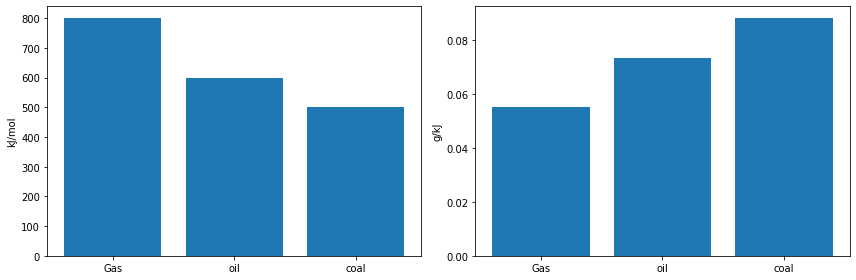

In [19]:
import matplotlib.pyplot as plt
fuels = ('Gas', 'oil', 'coal')
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.bar(fuels,[Heat_comb_CH4, Heat_comb_oil, Heat_comb_coal])
plt.ylabel('kJ/mol')
plt.subplot(1,2,2)
plt.bar(fuels, [CO2_per_heat_CH4, CO2_per_heat_oil, CO2_per_heat_coal])
plt.ylabel('g/kJ');
plt.tight_layout()

## Fuels
Assumption: 
* driving from houses to the agricultural lands 15 km/day
* Shipping
  -The closest large country is 500 km away
  - import/export of stuff in large containers
* Flights
  - two flights per day to nearby islands/lands (300 km)
  - one flight per day to/from the closest large country

## Fuel consumption
Automobiles
* Trucks: 12 L/km
* Cars: 8 L/km
* Average: 10 L/km  

Ships:
